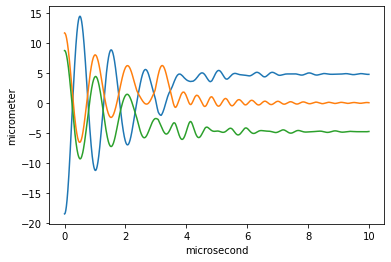

In [1]:
from ion_sim import IonSim, init
import numpy as np
import matplotlib.pyplot as plt
import pint
from math import pi as π

# create a pint unit registry and setup matplotlib
u = pint.UnitRegistry()
u.setup_matplotlib()

class SimpleExample(IonSim):
    def U(self, x, y, z, t):
        m = self.m
        ωx = 2*π * u('1 MHz')
        ωy = 2*π * u('5 MHz')
        ωz = 2*π * u('10 MHz')
        Ux = (1/2) * m * ωx**2 * x**2
        Uy = (1/2) * m * ωy**2 * y**2
        Uz = (1/2) * m * ωz**2 * z**2
        return (Ux + Uy + Uz).to_base_units().m
    
example = SimpleExample(u)

# create 3 ions with mass 40 amu (Ca+)
example.m = u('40 amu') * np.ones(3)
# add motional dissipation
example.gamma = u('1 MHz')

# set initial conditions
example.x0 = init.gaussian(example, sigma=np.array([10, 10, 10]) * u('um'))
example.v0 = init.thermal(example, T=u('1 mK'))

t = np.linspace(0, 10, 10000) * u('us')
example.run(t)
plt.plot(t,example.x[0,:,:].T)